In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [24]:
df=pd.read_csv('E:\diabetic_disease_web_project\data1\custom_target_accuracy_diabetes_dataset.csv')

<Axes: >

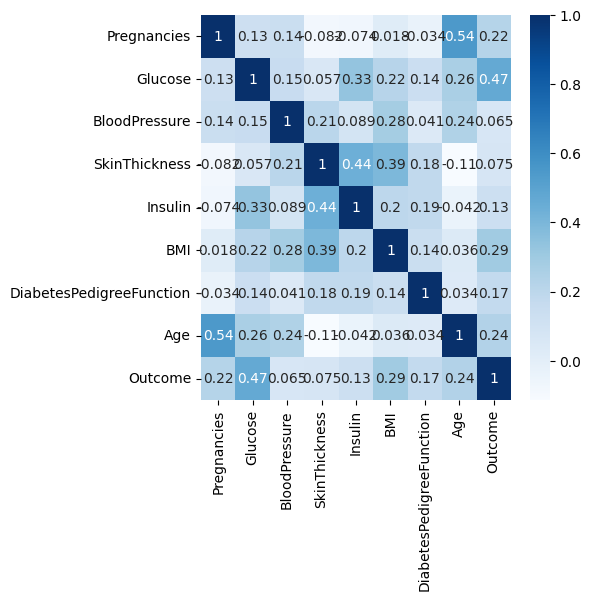

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,annot=True,cmap="Blues")

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

# Synthetic dataset
n = 1000
df = pd.DataFrame({
    'Age': np.random.randint(20, 70, size=n),
    'BMI': np.random.normal(28, 4, size=n),
    'Exercise/week': np.random.randint(0, 7, size=n),
    'Fast Food Density': np.random.uniform(5, 30, size=n),
    'Green Space': np.random.uniform(5, 60, size=n),
    'Air Quality': np.random.randint(60, 200, size=n),
    'Walkability': np.random.randint(10, 100, size=n),
    'Family History': np.random.choice([0, 1], size=n, p=[0.5, 0.5]),
})

def generate_label(row):
    score = 0
    if row['BMI'] > 29: score += 2
    if row['Exercise/week'] < 2: score += 2
    if row['Fast Food Density'] > 25: score += 2
    if row['Green Space'] < 15: score += 1
    if row['Air Quality'] > 150: score += 1
    if row['Walkability'] < 30: score += 1
    if row['Family History'] == 1: score += 2
    return 1 if score >= 6 else 0

df['Diabetes Risk'] = df.apply(generate_label, axis=1)

# Train-test split
X = df.drop('Diabetes Risk', axis=1)
y = df['Diabetes Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logit = LogisticRegression().fit(X_train_scaled, y_train)
print("Logistic Accuracy:", accuracy_score(y_test, logit.predict(X_test_scaled)) * 100)

# SVM
svm = SVC().fit(X_train_scaled, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_scaled)) * 100)

# Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)) * 100)

# Save dataset
df.to_csv("custom_target_accuracy_diabetes_dataset.csv", index=False)


Logistic Accuracy: 94.0
SVM Accuracy: 95.0
Random Forest Accuracy: 98.0


In [9]:
import joblib
joblib.dump(logit, 'logit_model_iris1.pkl') 
logit_model = joblib.load('logit_model_iris1.pkl')

In [10]:
import joblib
joblib.dump(rf, 'randomforest_model_iris1.pkl') 
randomforest_model = joblib.load('randomforest_model_iris1.pkl')

In [11]:
import joblib
joblib.dump(svm, 'svm_model_iris1.pkl') 
svm_model = joblib.load('svm_model_iris1.pkl')